In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, '../Config')
from lablib import LS_fit

# Prima parte

## Circuito RC

Abbiamo effettuato le misurazioni con il cursore dell'oscilloscopio. \
**Resistenza interna oscilloscopio** = 50 $\Omega$

Intrvallo tensione (0.5,-0.5) V \
Capacità = 10 nF \
resistenza = 67.1 $k\Omega$ \
frequenza = 200 Hz \
incertezza su oscilloscopio (precisione strumento) = 8 mV


In [17]:
# Primo plot dei dati
dati1 = pd.read_csv("Dati1.csv")

tempi1 = dati1["tempo(carica)"]
tens1 = dati1["tensione(carica1)"]

# plt.errorbar(tempi1, tens1, [8 for i in tens1], fmt = '.')
# plt.show()

In [18]:
# prova fit dei dati con libreria
def mod_exp(x, A, T, C):
    return A*np.exp(-x/T) + C

tempi1_µs = [i*1e-3 for i in tempi1]
tens1_mv = [i*1e-3 for i in tens1]
tens1_err = [.008 for i in tens1]

par1, val1, ers1, pval1, *other = LS_fit(tempi1_µs, tens1_mv, tens1_err, mod_exp, disp=1, A=1, T=1, C=0) # type: ignore

for p, v, e in zip(par1, val1, ers1):
    print(f"{p} = {v:.3f} ± {e:.3f}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.716 (chi2/ndof = 0.2)    │              Nfcn = 157              │
│ EDM = 1.58e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.964   │   0.006   │            │            │         │         │       │
│ 1 │ T    │ 0.652e-3  │ 0.011e-3  │            │            │         │         │       │
│ 2 │ C    │  -0.002   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         A         T         C │
├───┼───────────────────────────────┤
│ A │  3.92e-05  1.36e-09 -1.34e-05 │
│ T │  1.36e-09  1.21e-10 -4.24e-08 │
│ C │ -1.34e-05 -4.24e-08  2.25e-05 │
└───┴───────────────────────────────┘

A = 0.964 ± 0.006
T = 0.001 ± 0.000
C = -0.002 ± 0.005


In [19]:
QC, tau_1, c_0 = val1
R_1 = 67.1e3 # Ohm

C = tau_1/R_1
print(f"Capacità calcolata = {C:.3g} F")

Capacità calcolata = 9.72e-09 F


## Circuito RL

induttanza ~ 10 mH \
resistenza = 1 $\text{k}\Omega$ \
frequenza = 700 Hz \
range di tensione = (-1,1) V \
precisione oscilloscopio = 20 mV

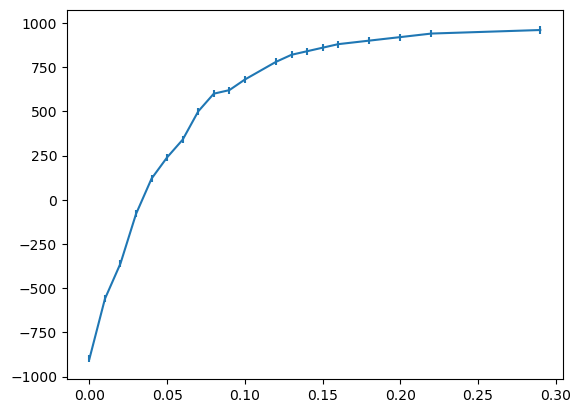

In [31]:
# plot dei dati

dati2 = pd.read_csv("Dati2.csv")
tempi2 = dati2["tempo"]
tens2 = dati2["tensione(carica)"]

plt.errorbar(tempi2, tens2, [20 for i in tens2])
plt.show()

In [21]:
# Fit circuito RL

tempi2_ms = [i*1e-3 for i in tempi2]
tens2_mv = [i*1e-3 for i in tens2]
tens2_err = [.02 for i in tens2]

par2, val2, ers2, pval2, *other2 = LS_fit(tempi2_ms, tens2_mv, tens2_err, mod_exp, A=1, T=1, C=1)

for p, v, e in zip(par2, val2, ers2):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 17.82 (chi2/ndof = 1.0)    │              Nfcn = 213              │
│ EDM = 9.66e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │  -1.873   │   0.016   │            │            │         │         │       │
│ 1 │ T    │  52.2e-6  │  1.1e-6   │            │            │         │         │       │
│ 2 │ C    │   0.967   │   0.010   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────┐
│   │        A        T        C │
├───┼────────────────────────────┤
│ A │ 0.000248 1.78e-09 -5.4e-05 │
│ T │ 1.78e-09 1.14e-12 8.34e-09 │
│ C │ -5.4e-05 8.34e-09 9.92e-05 │
└───┴────────────────────────────┘

A = -1.87 ± 0.0158
T = 5.22e-05 ± 1.07e-06
C = 0.967 ± 0.00996


In [22]:
Va, tau_2, c_1 = val2
R_2 = 1e3 # ohm

L = R_2 * tau_2
print(f"Induttanza misurata = {L:.3g} H")

Induttanza misurata = 0.0522 H


 # Seconda parte

## Circuito RLC

Resistenza = 300 $\Omega$ \
Induttanza e capacità uguali a prima \
Intervallo tensione (1,0)

Abbiamo stimato le costanti del sistema prima di prendere i dati:
* $\omega_0$ = 100 kHz
* $f_0 = \frac{\omega_0}{2\pi}$ = 16kHz 

Ci siamo resi presto conto che questi risultati sono insensati \
Frequenza effettivamente usata = 300 Hz


Per smorzamento critico abbiamo usato Resistenza = 3900 $\Omega$ \
Per sovrasmorzamento abbiamo usato Resistenza = 10_000 $\Omega$

### Caso sottosmorzato

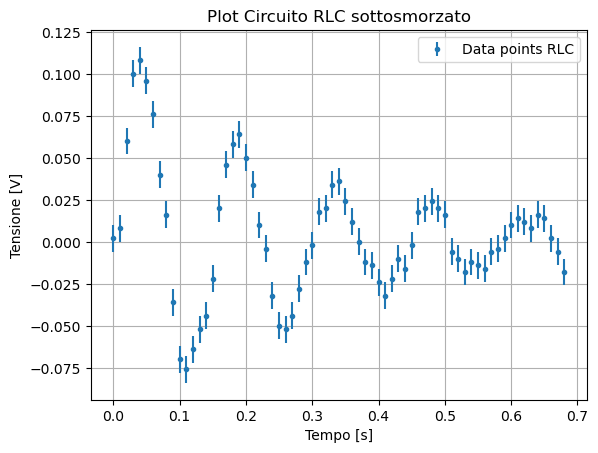

In [23]:
#plot dati RLC sottosmorzato

dati3 = pd.read_csv("Dati3.csv")
tempi3=dati3["tempo"]
tensione3=dati3["tensione"]

tempi3_s = [i*1e-3 for i in tempi3]
tensione3_v = [i*1e-3 for i in tensione3]

tens3_err = [8 for i in tensione3]
tens3_err_s = [.008 for i in tensione3]

plt.errorbar(tempi3, tensione3_v, tens3_err_s, fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sottosmorzato")
plt.xlabel("Tempo [s]")
plt.ylabel("Tensione [V]")
plt.legend()
plt.grid()
plt.show()

In [24]:
# fit dei dati nel caso sottosmorzato

R_3 = R_1
C_3 = C
L_3 = L

omega_0_calc = 1/np.sqrt(L_3*C_3)
gamma_calc_1 = R_3/(2*L_3)
omega_calc_1 = np.sqrt(gamma_calc_1**2 - omega_0_calc**2)

def mod_ssm(x, I0, gamma, omega):
    return I0 * np.exp(-gamma*x)*np.sin(omega*x)

par3, val3, ers3, pval3, *other3 = LS_fit(tempi3_s, tensione3_v, tens3_err_s, mod_ssm, 
                                          I0 = 0.113, 
                                          gamma = 3000., 
                                          omega = 45360.) #non so perche' proprio questi valori

for p, v, e in zip(par3, val3, ers3):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 112.9 (chi2/ndof = 1.7)    │              Nfcn = 95               │
│ EDM = 1.1e-07 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0    │   0.113   │   0.004   │            │            │         │         │       │
│ 1 │ gamma │  3.46e3   │  0.21e3   │            │            │         │         │       │
│ 2 │ omega │  41.95e3  │  0.14e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────┐
│       │        I0     gamma     omega │
├───────┼───────────────────────────────┤
│    I0 │     2e-05     0.696    -0.105 │
│ gamma │     0.696  4.41e+04 -6.72e+03 │
│ omega │    -0.105 -6.72e+03  2.09e+04 │
└───────┴───────────────────────────────┘

I0 = 0.113 ± 0.00447
gamma = 3.46e+03 ± 210
omega = 4.19e+04 ± 145


### Caso Smorzamento Critico 

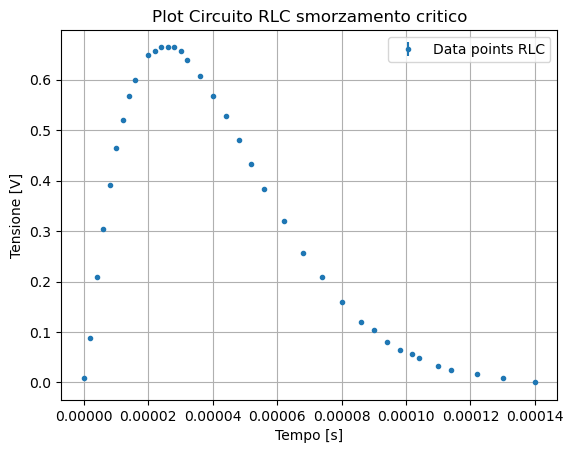

In [25]:
#plot dati RLC sottosmorzato
#resistenza usata R = 3900 omh

Dati3 = pd.read_csv("Dati3.csv")
tempo4 = Dati3["tempo2"].dropna()
tensione4 = Dati3["tensione2"].dropna()
tensione4_err = [8 for i in tensione4]

#trasporto le grandezze in SI
tempo4_s = [i*1e-3 for i in tempo4]
tensione4_v = [i*1e-3 for i in tensione4]
tensione4_err_v = [1e-3 for i in tensione4_err]

plt.errorbar(tempo4_s,tensione4_v,tensione4_err_v, fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC smorzamento critico")
plt.xlabel("Tempo [s]")
plt.ylabel("Tensione [V]")
plt.legend()
plt.grid()
plt.show()

In [26]:
R_4 = 3900

gamma_calc_2 = R_4/(2*L_3)

#modello criticamente smorzato
def mod_csm(x, I0, gamma):
    return I0 * x * np.exp(-gamma*x)
#fit smorzamento critico
par4, val4, ers4, pval4, *other4 = LS_fit(tempo4_s, tensione4_v, tensione4_err_v, mod_csm, 
                                          I0 = 76000, 
                                          gamma = 39000)

for p, v, e in zip(par4, val4, ers4):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.41e+04 (chi2/ndof = 974.3)│              Nfcn = 62               │
│ EDM = 5.25e-11 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0    │  76.90e3  │  0.06e3   │            │            │         │         │       │
│ 1 │ gamma │ 43.554e3  │  0.022e3  │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │       I0    gamma │
├───────┼───────────────────┤
│    I0 │ 3.35e+03 1.08e+03 │
│ gamma │ 1.08e+03      482 │
└───────┴───────────────────┘

I0 = 7.69e+04 ± 57.8
gamma = 4.36e+04 ± 22


### Caso sovrasmorzato

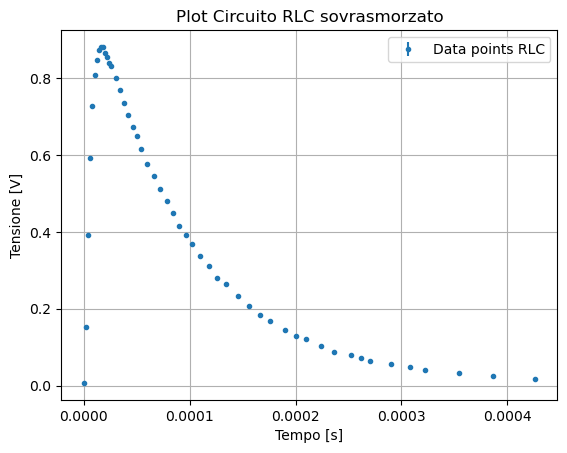

In [27]:
#plot dati RLC sovrasmorzato 
#resistenza utilizzato R= 10.000 ohm 

Dati5 = pd.read_csv("Dati3.csv")
tempo5= Dati5["tempo3"].dropna()
tensione5= Dati5["tensione3"].dropna()
tensione5_err = [8 for i in tensione5]

#trasporto le grandezze in SI
tempo5_s = [i*1e-3 for i in tempo5]
tensione5_v = [i*1e-3 for i in tensione5]
tensione5_err_v = [1e-3 for i in tensione5_err]

plt.errorbar(tempo5_s,tensione5_v, tensione5_err_v, fmt = '.',label="Data points RLC")
plt.title("Plot Circuito RLC sovrasmorzato")
plt.xlabel("Tempo [s]")
plt.ylabel("Tensione [V]")
plt.legend()
plt.grid()
plt.show()

In [28]:
R_5 = 10000
gamma_calc_3 = R_5/(2*L_3)
omega_calc_3 = np.sqrt(gamma_calc_1**2 - omega_0_calc**2)

# modello sovrasmorzato
def mod_svsm(x, I0, gamma, omega):
    return I0 * np.exp(-gamma*x) * (np.exp(omega*x) - np.exp(-omega*x))

#fit sovrasmorzamento
par5, val5, ers5, pval5, *other5 = LS_fit(tempo5_s, tensione5_v, tensione5_err_v, mod_svsm, 
                                          I0 = 1.15, 
                                          gamma = 100000, 
                                          omega = 45360) #non so perche' proprio questi valori

for p, v, e in zip(par5, val5, ers5):
    print(f"{p} = {v:.3g} ± {e:.3g}")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.763e+04 (chi2/ndof = 575.7)│              Nfcn = 162              │
│ EDM = 3.85e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ I0    │  1.1524   │  0.0008   │            │            │         │         │       │
│ 1 │ gamma │  79.15e3  │  0.11e3   │            │            │         │         │       │
│ 2 │ omega │  67.98e3  │  0.11e3   │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬────────────────────────────┐
│       │       I0    gamma    omega │
├───────┼────────────────────────────┤
│    I0 │ 6.06e-07  -0.0626  -0.0697 │
│ gamma │  -0.0626 1.14e+04  1.2e+04 │
│ omega │  -0.0697  1.2e+04 1.27e+04 │
└───────┴────────────────────────────┘

I0 = 1.15 ± 0.000779
gamma = 7.91e+04 ± 107
omega = 6.8e+04 ± 113


In [30]:

print(f"gamma1={gamma_calc_1:.3g}\ngamma2={gamma_calc_2:.3g}\ngamma3={gamma_calc_3:.3g}")
print(f"omega1={omega_calc_1:.3g}\nomega3={omega_calc_3:.3g}")



gamma1=6.43e+05
gamma2=3.74e+04
gamma3=9.58e+04
omega1=6.41e+05
omega3=6.41e+05
